# การประมาณการแบบ logistic regression  

#### เรียก library ที่ใช้ในการประมาณการ

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

## Data vistualization

In [2]:
data = pd.read_csv('https://github.com/Siriratkant/Logistic-regression/raw/master/heart.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


**Data contains**   

* age - age in years   
* sex - (1 = male; 0 = female)   
* cp - chest pain type   
* trestbps - resting blood pressure (in mm Hg on admission to the hospital)   
* chol - serum cholestoral in mg/dl   
* fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)   
* restecg - resting electrocardiographic results   
* thalach - maximum heart rate achieved   
* exang - exercise induced angina (1 = yes; 0 = no)   
* oldpeak - ST depression induced by exercise relative to rest   
* slope - the slope of the peak exercise ST segment   
* ca - number of major vessels (0-3) colored by flourosopy   
* thal - 3 = normal; 6 = fixed defect; 7 = reversable defect   
* **target - have disease or not (1=yes, 0=no)**   

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


#### นับ output ว่าแต่ละกลุ่มมีเท่าไร

In [4]:
data.target.value_counts()

1    165
0    138
Name: target, dtype: int64

####  plot graph ดูว่าแต่ละกลุ่มมีเท่าไร 

สีที่ใช้ : https://matplotlib.org/3.1.0/gallery/color/named_colors.html

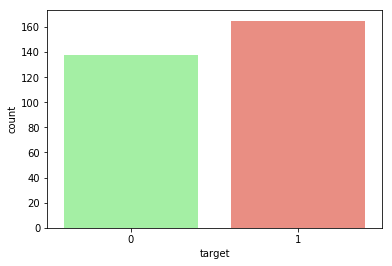

In [5]:
sns.countplot(x="target", data=data, palette=['palegreen','salmon']) 
plt.show()

#### ดูว่ามีคนเป็นมะเร็งเท่าไรต่อคนไข้ทั้งหมด โดยดูเป็นเปอร์เซ็น

In [6]:
NoDisease = len(data[data.target == 0])
HaveDisease = len(data[data.target == 1])
print("Percentage of Patients Haven't Heart Disease: {:.2f}%".format((NoDisease / (len(data.target))*100)))
print("Percentage of Patients Have Heart Disease: {:.2f}%".format((HaveDisease / (len(data.target))*100))) 

Percentage of Patients Haven't Heart Disease: 45.54%
Percentage of Patients Have Heart Disease: 54.46%


#### ดูสัดส่วนคนไข้ว่ามีผู้หญิงหรือผู้ชายกี่คน 

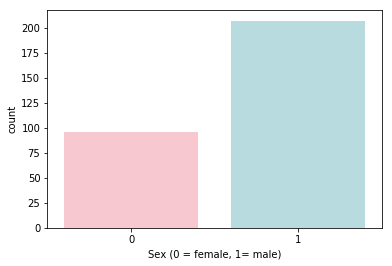

In [7]:
sns.countplot(x='sex', data=data, palette=['pink','powderblue'])
plt.xlabel('Sex (0 = female, 1= male)')
plt.show()

#### หรือดูแบบเปอร์เซ็นก็ได้

In [8]:
Female = len(data[data.sex == 0])
Male = len(data[data.sex == 1])
print("Percentage of Female Patients: {:.2f}%".format((Female / (len(data.sex))*100)))
print("Percentage of Male Patients: {:.2f}%".format((Male / (len(data.sex))*100))) 

Percentage of Female Patients: 31.68%
Percentage of Male Patients: 68.32%


#### สามารถดูค่า mean ของแต่ละ feature 

ทำได้โดยใช้คำสั่ง groupby('target') โดยที่มันจะใช้กลุ่มใน target column เป็นตัวแบ่งกลุ่ม และจากนั้นมันจะหาค่า mean ของแต่ละกลุ่มอีกที

In [9]:
data.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478
1,52.496970,0.563636,1.375758,129.303030,242.230303,0.139394,0.593939,158.466667,0.139394,0.583030,1.593939,0.363636,2.121212


#### พล็อตกราฟแสดงความสัมพันธ์ของ 2 ตัวแปรด้วยคำสั่ง pd.crosstab()

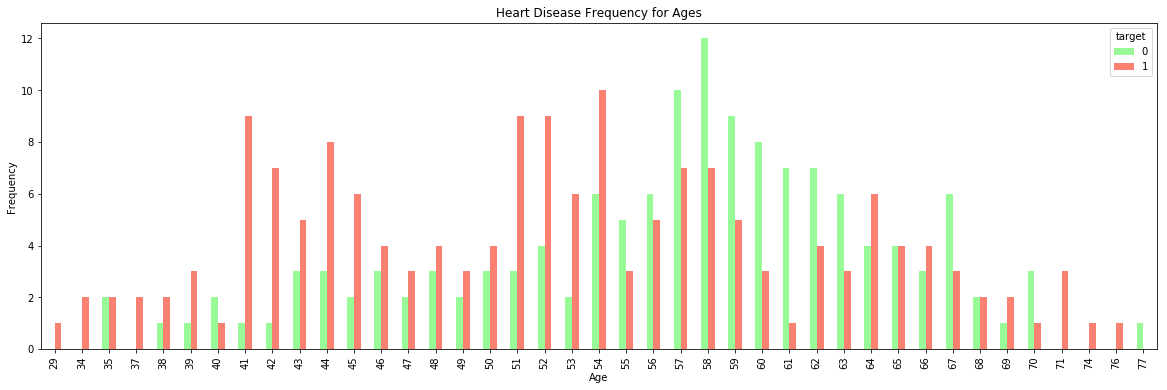

In [10]:
pd.crosstab(data.age,data.target).plot(kind="bar",figsize=(20,6),color=['palegreen','salmon'])
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('heartDiseaseAndAges.png')
plt.show()

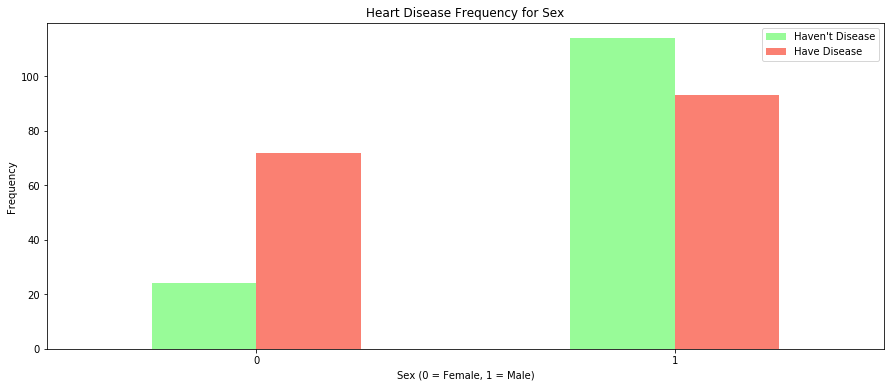

In [11]:
pd.crosstab(data.sex,data.target).plot(kind="bar",figsize=(15,6),color=['palegreen','salmon'])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0) 
plt.legend(["Haven't Disease", "Have Disease"]) 
plt.ylabel('Frequency')
plt.show()

#### พล็อตดูการกระจายตัวของข้อมูล

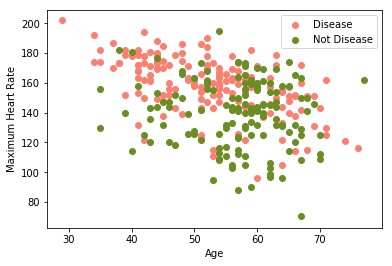

In [12]:
plt.scatter(x=data.age[data.target==1], y=data.thalach[(data.target==1)], color ="salmon")
plt.scatter(x=data.age[data.target==0], y=data.thalach[(data.target==0)],color ="olivedrab")
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

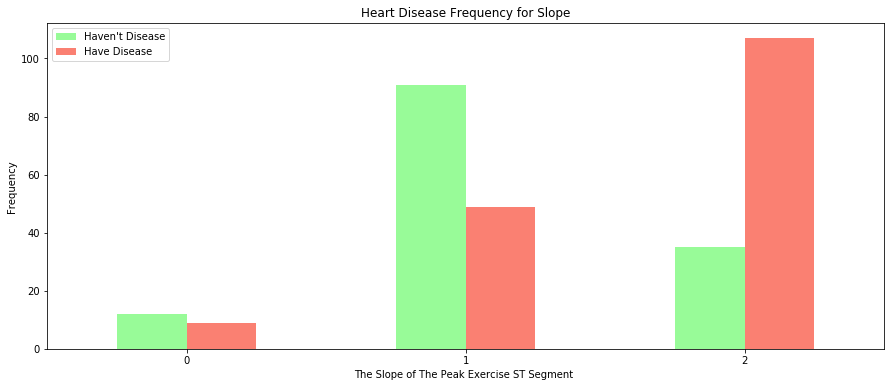

In [13]:
pd.crosstab(data.slope,data.target).plot(kind="bar",figsize=(15,6),color=['palegreen','salmon' ])
plt.title('Heart Disease Frequency for Slope')
plt.xlabel('The Slope of The Peak Exercise ST Segment ')
plt.xticks(rotation = 0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

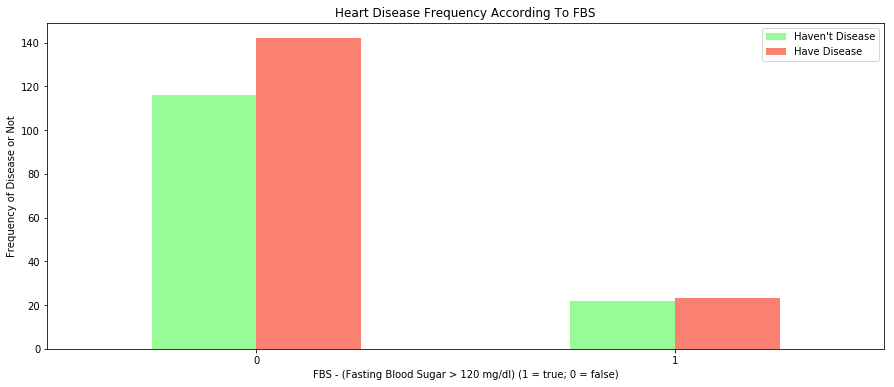

In [14]:
pd.crosstab(data.fbs,data.target).plot(kind="bar",figsize=(15,6),color=['palegreen','salmon'])
plt.title('Heart Disease Frequency According To FBS')
plt.xlabel('FBS - (Fasting Blood Sugar > 120 mg/dl) (1 = true; 0 = false)')
plt.xticks(rotation = 0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency of Disease or Not')
plt.show()

In [15]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [16]:
data.cp.value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

## Data estimation 

In [18]:
a = pd.get_dummies(data['cp'], prefix = "cp")
b = pd.get_dummies(data['thal'], prefix = "thal")
c = pd.get_dummies(data['slope'], prefix = "slope")
d = pd.get_dummies(data['exang'], prefix = "exang")
e = pd.get_dummies(data['fbs'], prefix = "fbs")
f =  pd.get_dummies(data['restecg'], prefix = "restecg")
g = pd.get_dummies(data['ca'], prefix = "ca")

In [19]:
frames = [data, a, b, c,d,e,f,g]
data = pd.concat(frames, axis = 1)
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,fbs_0,fbs_1,restecg_0,restecg_1,restecg_2,ca_0,ca_1,ca_2,ca_3,ca_4
0,63,1,3,145,233,1,0,150,0,2.3,...,0,1,1,0,0,1,0,0,0,0
1,37,1,2,130,250,0,1,187,0,3.5,...,1,0,0,1,0,1,0,0,0,0
2,41,0,1,130,204,0,0,172,0,1.4,...,1,0,1,0,0,1,0,0,0,0
3,56,1,1,120,236,0,1,178,0,0.8,...,1,0,0,1,0,1,0,0,0,0
4,57,0,0,120,354,0,1,163,1,0.6,...,1,0,0,1,0,1,0,0,0,0


In [20]:
data = data.drop(columns = ['cp', 'thal', 'slope','exang','fbs','restecg','ca','thal_0',  'cp_0','slope_0','exang_0', 'fbs_0','restecg_0','ca_0'])
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,slope_1,slope_2,exang_1,fbs_1,restecg_1,restecg_2,ca_1,ca_2,ca_3,ca_4
0,63,1,145,233,150,2.3,1,0,0,1,...,0,0,0,1,0,0,0,0,0,0
1,37,1,130,250,187,3.5,1,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,41,0,130,204,172,1.4,1,1,0,0,...,0,1,0,0,0,0,0,0,0,0
3,56,1,120,236,178,0.8,1,1,0,0,...,0,1,0,0,1,0,0,0,0,0
4,57,0,120,354,163,0.6,1,0,0,0,...,0,1,1,0,1,0,0,0,0,0


In [21]:
data.columns

Index(['age', 'sex', 'trestbps', 'chol', 'thalach', 'oldpeak', 'target',
       'cp_1', 'cp_2', 'cp_3', 'thal_1', 'thal_2', 'thal_3', 'slope_1',
       'slope_2', 'exang_1', 'fbs_1', 'restecg_1', 'restecg_2', 'ca_1', 'ca_2',
       'ca_3', 'ca_4'],
      dtype='object')

In [22]:
data.T

,0,1,2,3,4,5,6,7,8,9,...,293,294,295,296,297,298,299,300,301,302
age,63.0,37.0,41.0,56.0,57.0,57.0,56.0,44.0,52.0,57.0,...,67.0,44.0,63.0,63.0,59.0,57.0,45.0,68.0,57.0,57.0
sex,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,...,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0
trestbps,145.0,130.0,130.0,120.0,120.0,140.0,140.0,120.0,172.0,150.0,...,152.0,120.0,140.0,124.0,164.0,140.0,110.0,144.0,130.0,130.0
chol,233.0,250.0,204.0,236.0,354.0,192.0,294.0,263.0,199.0,168.0,...,212.0,169.0,187.0,197.0,176.0,241.0,264.0,193.0,131.0,236.0
thalach,150.0,187.0,172.0,178.0,163.0,148.0,153.0,173.0,162.0,174.0,...,150.0,144.0,144.0,136.0,90.0,123.0,132.0,141.0,115.0,174.0
oldpeak,2.3,3.5,1.4,0.8,0.6,0.4,1.3,0.0,0.5,1.6,...,0.8,2.8,4.0,0.0,1.0,0.2,1.2,3.4,1.2,0.0
target,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
cp_1,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
cp_2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
cp_3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [23]:
data.shape

(303, 23)

* สร้าง object เพื่อบรรจุตัวแปรและค่าในแต่ละ feature ที่เราต้องการนำมาคำนวณ

In [24]:
y = data.target.values
x_data = data.drop(['target'], axis = 1)

In [25]:
x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data)).values

* แบ่งข้อมูลเป็น training set และ testing set 

In [26]:
x_train, x_test, y_train, y_test = train_test_split (x,y,test_size = 0.2,random_state = 0)

* transpose matrices 

In [27]:
x_train.head()

,age,sex,trestbps,chol,thalach,oldpeak,cp_1,cp_2,cp_3,thal_1,...,slope_1,slope_2,exang_1,fbs_1,restecg_1,restecg_2,ca_1,ca_2,ca_3,ca_4
74,0.291667,0.0,0.264151,0.198630,0.717557,0.032258,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
153,0.770833,0.0,0.490566,0.347032,0.618321,0.000000,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
64,0.604167,1.0,0.433962,0.194064,0.717557,0.000000,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
296,0.708333,0.0,0.283019,0.162100,0.496183,0.000000,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
287,0.583333,1.0,0.566038,0.242009,0.709924,0.000000,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [28]:
x_train = x_train.T
y_train = y_train.T
x_test = x_test.T
y_test = y_test.T

In [29]:
x_train.shape 

(22, 242)

In [30]:
x_train.head()

,74,153,64,296,287,286,236,126,73,20,...,242,277,211,9,195,251,192,117,47,172
age,0.291667,0.770833,0.604167,0.708333,0.583333,0.625000,0.604167,0.375000,0.458333,0.625000,...,0.729167,0.583333,0.666667,0.583333,0.625000,0.291667,0.520833,0.562500,0.375000,0.604167
sex,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
trestbps,0.264151,0.490566,0.433962,0.283019,0.566038,0.377358,0.292453,0.169811,0.433962,0.386792,...,0.481132,0.283019,0.245283,0.528302,0.716981,0.358491,0.245283,0.245283,0.415094,0.245283
chol,0.198630,0.347032,0.194064,0.162100,0.242009,0.178082,0.397260,0.178082,0.308219,0.246575,...,0.196347,0.308219,0.305936,0.095890,0.456621,0.276256,0.141553,0.152968,0.299087,0.360731
thalach,0.717557,0.618321,0.717557,0.496183,0.709924,0.694656,0.763359,0.549618,0.877863,0.687023,...,0.465649,0.534351,0.526718,0.786260,0.526718,0.549618,0.320611,0.694656,0.648855,0.679389


### Step 1 : เขียนสูตรหาค่า Theta จากข้อมมูล training set

In [31]:
def initialize(dimension):
    
    weight = np.full((dimension,1),0.01) 
    
    return weight

In [32]:
np.full((2,1),0.01)

array([[0.01],
       [0.01]])

In [33]:
x_train.shape

(22, 242)

<img src = 'https://drive.google.com/uc?id=1m9RiA5VfAsaKXIMHVpOfwKXKUnN9aB4p' width = 500 height = 500 />

In [34]:
def sigmoid(z):
    
    Yp = 1/(1+ np.exp(-z))
    return Yp

<img src ='https://drive.google.com/uc?id=1-fIPVQgXKMhdl8eXjIfHHOEevQ72qDo5' width = 400 height = 400 />

In [35]:
def costfunction(weight,x_train,y_train):
    
    
    Yp = sigmoid(np.dot(weight.T,x_train)) 
    costf = -(y_train*np.log(Yp) + (1-y_train)*np.log(1-Yp)) 
    sumcost = np.sum(costf) / x_train.shape[1]  
    

    derivative_weight = np.dot(x_train,((Yp - y_train).T))/x_train.shape[1]

    gradients = {"Derivative Weight" : derivative_weight }
    
    return sumcost,gradients

<img src ='https://drive.google.com/uc?id=1Q04C9SoVBYcWJezyNt0M76aAqFlJR9eW' width = 400 height = 400 />

In [36]:
def update(weight,x_train,y_train,learningRate,iteration) : 
    costList = [] 
    index = []
    
    
    for i in range(iteration):
        sumcost,gradients = costfunction(weight,x_train,y_train) 
        weight = weight - learningRate * gradients["Derivative Weight"] 

        
        costList.append(sumcost) 
        index.append(i)

    parameters = {"weight": weight} 
    
    print("iteration:",iteration)
    print("sumcost:",sumcost)

    plt.plot(index,costList) 
    plt.xlabel("Number of Iteration")
    plt.ylabel("Cost")
    plt.show()

    return parameters, gradients 

In [37]:
np.append([1, 2, 3], [[4, 5, 6], [7, 8, 9]])

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

### Step 2 : คำนวณโดยใช้ค่า theta ที่ได้ก่อนหน้า มาใช้กับข้อมูล Testing set 

In [38]:
def predict(weight,x_test): 
    z = np.dot(weight.T,x_test) 
    Yp = sigmoid(z)

    y_prediction = np.zeros((1,x_test.shape[1])) 
    
    for i in range(Yp.shape[1]):
        if Yp[0,i] <= 0.5:   
            y_prediction[0,i] = 0 
        else: 
            y_prediction[0,i] = 1
    return y_prediction

In [39]:
x_train.shape[1] 

242

In [40]:
def logistic_regression(x_train,y_train,x_test,y_test,learningRate,iteration): 
    dimension = x_train.shape[0] 
    weight = initialize(dimension) 
    
    parameters, gradients = update(weight,x_train,y_train,learningRate,iteration) 
    y_prediction = predict(parameters["weight"],x_test) 
    
    print("Manuel Test Accuracy: {:.14f}%".format((100 - np.mean(np.abs(y_prediction - y_test))*100))) 
    print("y_prediction:",y_prediction)
    print("parameters:",parameters)

iteration: 100
sumcost: 0.33495633104130396


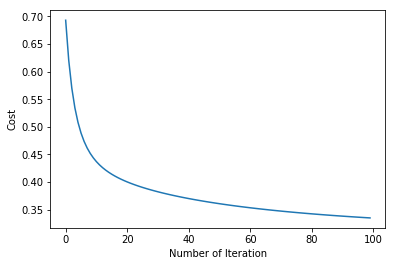

Manuel Test Accuracy: 86.88524590163934%
y_prediction: [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 0. 0. 0.
  1. 0. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 0. 0. 0. 1. 1. 0. 0. 1. 1. 0.
  0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1.]]
parameters: {'weight': array([[-0.09343614],
       [-0.96150249],
       [-0.25127946],
       [-0.07141706],
       [ 1.12290647],
       [-0.75334606],
       [ 0.70816364],
       [ 1.32365564],
       [ 0.96538787],
       [ 0.04833403],
       [ 1.05521029],
       [-0.49321078],
       [-0.24802966],
       [ 0.58213222],
       [-0.80438683],
       [-0.05418821],
       [ 0.35231713],
       [-0.19677498],
       [-1.30835416],
       [-1.62005724],
       [-1.4537731 ],
       [ 0.24762115]])}


In [41]:
logistic_regression(x_train,y_train,x_test,y_test,1,100)

In [42]:
y_test

array([0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1], dtype=int64)